<a href="https://colab.research.google.com/github/Dont-look-at-me/1/blob/main/DNN%E6%89%8B%E5%AF%AB%E6%95%B8%E5%AD%97%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 建立DNN模型做手寫數字辨識


## 比較細需要多注意的超參數有：
  * activation 通常用到的有 relu, sigmoid, softmax
  * loss = 'categorical_crossentropy', 'binary_crossentropy',     'sparse_categorical_crossentropy', 'mse'
  * optimizer 常用的有 adam, sgd, rmsprop, adagrad 等
  * Activation: relu,sigmoid, softmax
  * batch_size
  * metrics
  * verbose
  * epochs

## 1.載入需用套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization



## 2.匯入MINIST手寫辨識數據集以及資料前處理


使用 tensorflow.keras.datasets 28x28 的手寫數字數據集

In [2]:
#載入MNIST資料集：
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 3.對圖片做資料前處理

In [3]:
#資料預處理：這裡將資料轉換為一維向量並進行標準化，將像素值除以 255，使其落在 0 到 1 的範圍內
X_train=X_train.reshape(len(X_train),-1)/255
X_test=X_test.reshape(len(X_test),-1)/255


# one hot encoding: 這裡將標籤進行 One-hot 編碼，將每個標籤轉換為長度為 10 的二進位向量，以便在訓練時使用。
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


看看某一張圖片做了one_hot encoding後長什麼樣子

In [4]:
y_train_one_hot[50]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [5]:
y_train[50]

np.uint8(3)

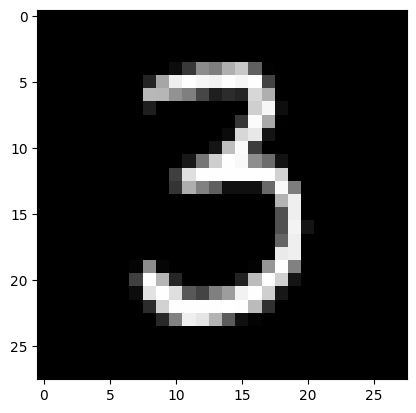

3


In [6]:
plt.imshow(X_train[50].reshape(28, 28), cmap='gray')
plt.show()
print(y_train[50])

## 4.打造神經網路模型

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.19.0


In [8]:
#建立模型：這段程式碼定義了一個 Sequential 型神經網路模型，模型包含兩個全連接層，使用 relu 激活函數和 softmax 激活函數。
#model.add(BatchNormalization())
#model.add(Dropout(0.3))
from tensorflow.keras.layers import BatchNormalization

def build_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=X_train.shape[-1]))
    model.add(Dense(100, activation='relu', input_dim=X_train.shape[-1]))
    model.add(Dense(25, activation='relu', input_dim=X_train.shape[-1]))
    model.add(Dense(10, activation='softmax'))
    return model


In [9]:
model = build_model()
model.summary()   # Weights = (784+1)*25+(25+1)*10

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         2,525 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,385 (356.97 KB)

 Trainable params: 91,385 (356.97 KB)

 Non-trainable params: 0 (0.00 B)

## 5.編譯&訓練模型

In [ ]:
# 編譯模型:這段程式碼設定了模型的優化器、損失函數和評估指標

optim = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])


# 訓練模型:這段程式碼用訓練資料訓練模型，指定了批次大小、訓練迭代次數、是否混洗資料和驗證集的比例。
history = model.fit(X_train, y_train_one_hot,
                    batch_size=64,
                    epochs=25,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)



# model.fit(): 這是 TensorFlow 中用於訓練模型的函式，它會將輸入資料和標籤作為參數，並根據指定的訓練設定來訓練模型
# X_train: 訓練資料的特徵，通常是一個 Numpy 陣列
# y_train_one_hot: 訓練資料的標籤，通常是經過 One-hot 編碼的 Numpy 陣列
# batch_size: 每個訓練批次的樣本數量。在每個批次中，模型會根據這些樣本的資訊進行參數更新。較大的批次大小可以提高訓練速度，但可能會佔用更多記憶體
# epochs: 訓練迭代的次數，每個迭代都會經過整個訓練資料集
# verbose: 控制訓練過程中的輸出資訊。設定為 0 表示不輸出任何訊息，設定為 1 表示輸出進度條，設定為 2 表示每個 epoch 輸出一行訊息
# shuffle: 是否在每個 epoch 開始前將訓練資料洗牌。這有助於防止模型對資料的順序產生記憶效應
# validation_split: 驗證資料的比例。在訓練過程中，會從訓練資料中分割出一部分作為驗證資料，用於評估模型的性能。這裡指定的比例為 0.1，表示將訓練資料的 10% 作為驗證資料
# history: 此變數用於存儲訓練過程中的歷史記錄，包括損失函數和評估指標的值。該變數將包含訓練期間每個 epoch 的損失和準確率等指標的變化情況


#總結來說，這段程式碼執行了模型的訓練過程，使用了訓練資料 X_train 和 y_train_one_hot，並根據指定的訓練設定進行訓練，同時將訓練過程中的歷史記錄存儲在 history 變數中。
#訓練過程中會進行多個 epoch 的迭代，每個 epoch 會使用 batch_size 數量的樣本進行模型參數的更新。


Epoch 1/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - acc: 0.8172 - loss: 0.6071 - val_acc: 0.9657 - val_loss: 0.1232
Epoch 2/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.9603 - loss: 0.1359 - val_acc: 0.9677 - val_loss: 0.1142
Epoch 3/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9730 - loss: 0.0881 - val_acc: 0.9740 - val_loss: 0.0903
Epoch 4/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9798 - loss: 0.0649 - val_acc: 0.9750 - val_loss: 0.0886
Epoch 5/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9844 - loss: 0.0514 - val_acc: 0.9742 - val_loss: 0.1022
Epoch 6/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9868 - loss: 0.0407 - val_acc: 0.9732 - val_loss: 0.1027
Epoch 7/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9877 - loss: 0.0382 - val_acc: 0.9785 - val_loss: 0.0851
Epoch 8/25


## 6.觀察訓練結果

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

## 7.觀察模型在訓練集和測試集 loss

In [ ]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## 8.觀察訓練集和測試集 accuracy

In [ ]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 9.用測試集做預測

In [ ]:
from sklearn.metrics import accuracy_score

pred =  np.argmax(model.predict(X_test), axis=1)
accuracy_score(y_test, pred)

## 10.統計training set預測正確與錯誤內容

10000 筆測試圖片中個找出前 8 張預測正確與錯誤的圖片。

In [ ]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(X_test)):
    if(y_test[i]==pred[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(X_test)):
    if(y_test[i]!=pred[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

## training set 預測正確

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]].reshape(28, 28), cmap='gray')
        ax[i,j].set_title("Predicted : "+str(pred[prop_class[count]])+"\n"+"Actual : "+str(y_test[prop_class[count]]))
        plt.tight_layout()
        count+=1

## testing set 預測錯誤

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]].reshape(28, 28), cmap='gray')
        ax[i,j].set_title("Predicted : "+str(pred[mis_class[count]])+"\n"+"Actual : "+str(y_test[mis_class[count]]))
        plt.tight_layout()
        count+=1